# 

# Scikit-Learn


|group | nom | prenom| nom2 | prenom2 | nom3| prenom3
|-----|-----|-----|-----|-----|-----|-----|
|1-B |PINEAU|Florian|MOUAOUED|Walid|mesbah|slimane

## Exploration de données et classification

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # 1.0.2

1.0.2


---

### Exploration avec pandas

#### Créez la dataframe

https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset


Descripteurs (features) :

* `CRIM`: taux de criminalité par habitant par ville
* `ZN`: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.
* `INDUS`: proportion d'acres commerciaux/non-commerciaux par ville
* `CHAS`: variable fictive de Charles River (= 1 si la zone délimite la rivière; 0 sinon)
* `NOX`: concentration d'oxydes nitriques (parties par 10 millions)
* `RM`: nombre moyen de pièces par logement
* `AGE`: proportion de logements occupés par leur propriétaire construits avant 1940
* `DIS`: distances pondérées des cinq centres d'emploi de Boston
* `RAD`: indice d'accessibilité aux autoroutes radiales
* `TAX`: taux d'imposition foncière de la valeur totale par tranche de 10 000 $
* `PTRATIO`: ratio élèves-enseignant par ville
* `B`: 1000(A - 0.63)^2 où A est la proportion d'habitants afro-américains par ville
* `LSTAT`: pourcentage d'habitant en dessous du seuil de pauvreté

Cible (target) :

* `MEDV`: Valeur médiane des logements occupés par leur propriétaire en 1 000 $

In [4]:
try:
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        boston = datasets.load_boston()
except ModuleNotFoundError:
    boston = datasets.load_boston()
# print(boston.DESCR)

In [5]:
# adding all the features to data frame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target
boston_df  # final data in dataframe formate

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

#### Descriptions

In [6]:
boston_df.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6

In [7]:
boston_df.describe().style.format("{:.3g}")

#### Corrélations

On peut faire très rapidement un tableau des corrélations avec toutes les données via [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [10]:
corr_df = boston_df.corr()

corr_df.style.format("{:.2g}")

La methode [`DataFrame.style.Styler.background_gradient`](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html) permet de représenter le `DataFrame` en *heatmap*.

Dans ce cas, il est important de prendre une double coloration (ici positive en vert et négative en rose) pour mettre en évidence à la fois la valeur absolue des corrélations et leur polarité.

In [ ]:
corr_df.style.background_gradient(cmap="PiYG", vmin=-1).format("{:.2g}")

#### Graphiques dans pandas

Il est possible de construire des graphiques très facilement à partir des `DataFrame` de pandas qui offrent un accès à l'API de Matplotlib, comme par exemple avec la méthode [`DataFrame.hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

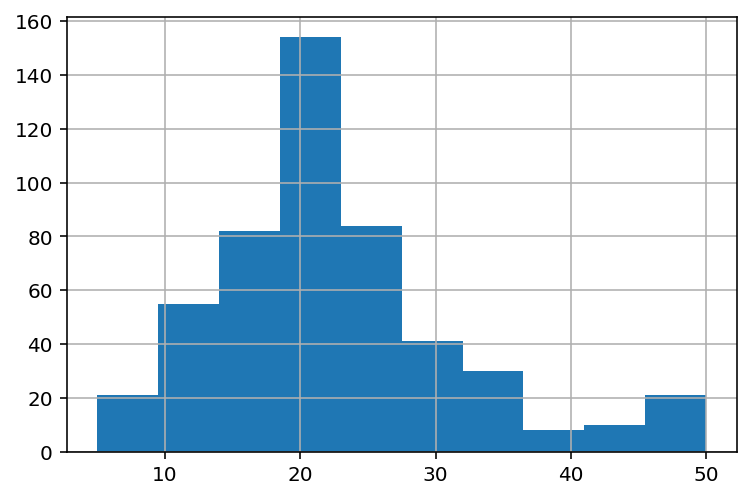

In [ ]:
boston_df["PRICE"].hist()
plt.show()

Par défaut, l'histogramme est divisé en 10 paniers (*bins*). On peut voir que le choix du nombre de paniers influence grandement la forme des histogrammes.

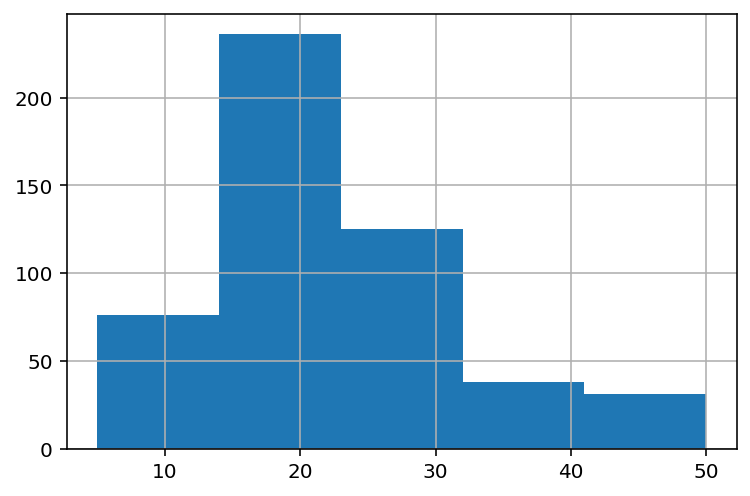

In [ ]:
boston_df["PRICE"].hist(bins=5)
plt.show()

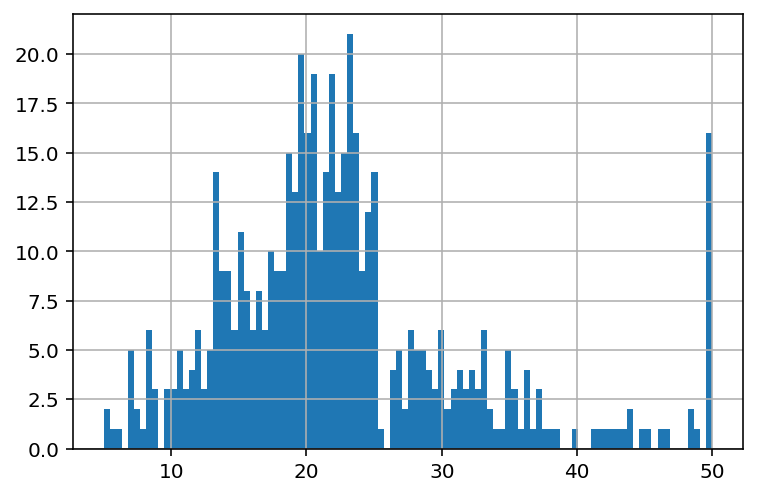

In [ ]:
boston_df["PRICE"].hist(bins=100)
plt.show()

#### Scatter matrix

Une autre façon de visualiser la corrélation entre des descripteurs est via la fonction [`pandas.plotting.scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) de pandas, qui trace chaque descripteur numérique par rapport à chaque autre descripteur numérique. 

Comme on a 13 descripteurs numériques, vous obtiendrez $13 \times 13 = 169$ figures, ce qui ne serait pas lisible sur une page, alors concentrons-nous simplement sur quelques-uns d'entre eux.

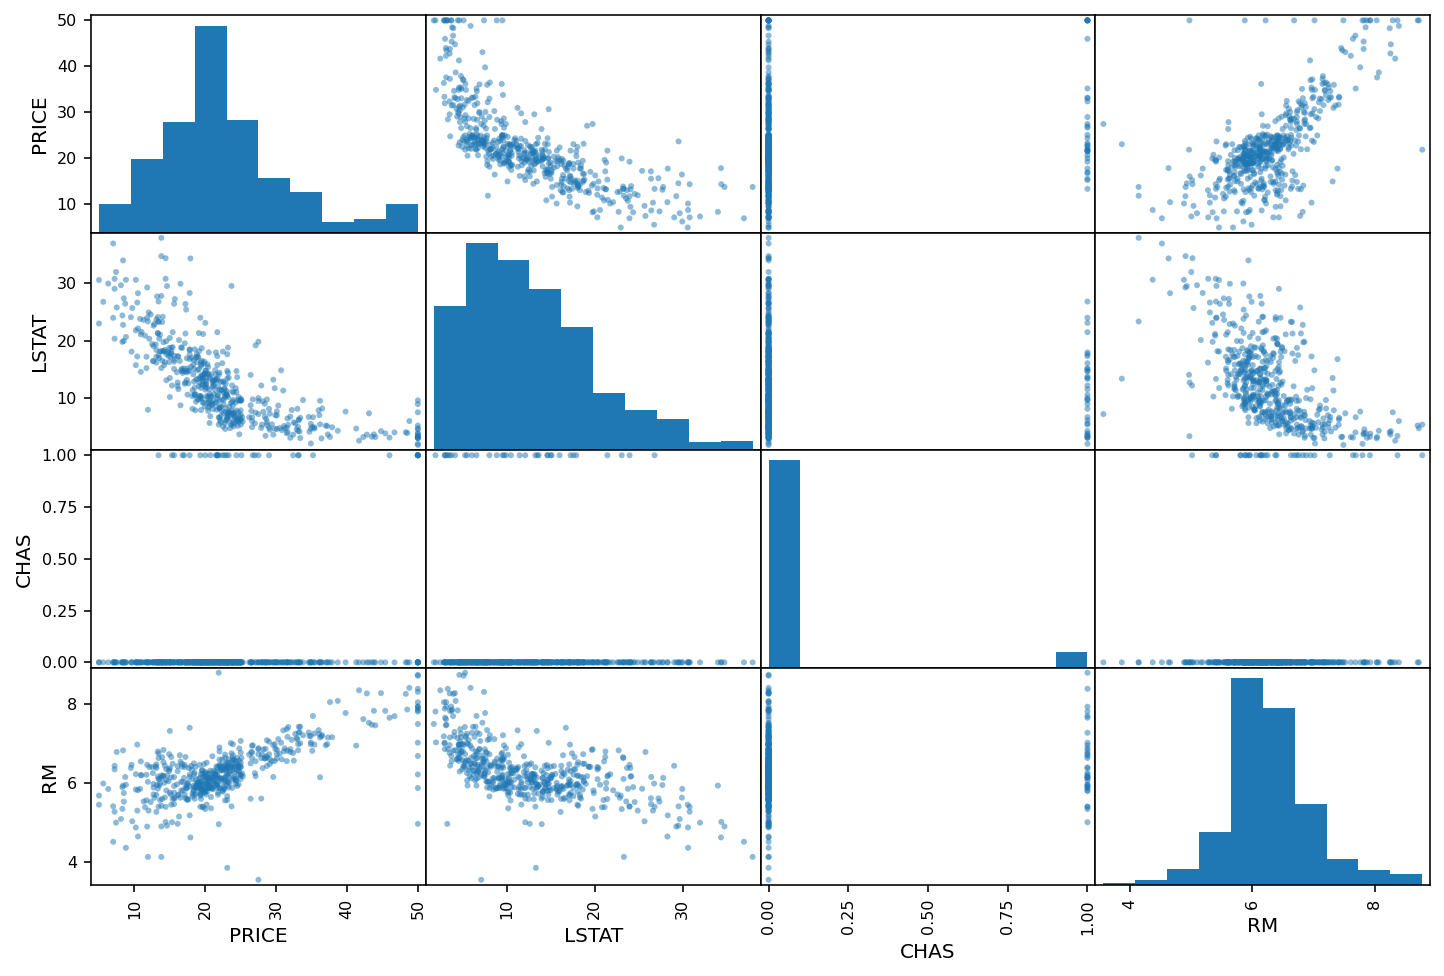

In [ ]:
FTS = ["PRICE", "LSTAT", "CHAS", "RM"]
pd.plotting.scatter_matrix(boston_df[FTS], figsize=(12, 8))
plt.show()

On peut voir les corrélations positives et négatives avec PRICE, et celles peu corrélées (en l'occurence CHAS, la proximité de la rivière, qui est une variable binaire).

---

### Classification (digits)

On va regarder la classification en terme de précision et rappel (et non-plus uniquement en terme d'accuracy).

#### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [ ]:
digits = datasets.load_digits()

In [ ]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


Sélectionnez de manière aléatoire le dataset d'entrainement et de test (via la fonction [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, random_state=1)

#### Entrainement des modèles

Entrainez le modèle avec l'algorithme de classification [Naive Bayes avec le noyau Gaussien](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

#### Évaluation

Évaluez avec l'[`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Puis donnez une résultats plus complet, incluant précision, rappel est et f1-score avec la fonction [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
score = accuracy_score(Y_test, Y_pred)
print("accuracy score = " +f"{score :.04f}")

target_names = [f'degit {x}' for x in range(10)]
clf_report= classification_report(Y_test, Y_pred, target_names=target_names)
print(clf_report)

accuracy score = 0.8533
              precision    recall  f1-score   support

     degit 0       0.98      0.96      0.97        53
     degit 1       0.81      0.81      0.81        42
     degit 2       0.93      0.66      0.77        41
     degit 3       0.93      0.77      0.84        52
     degit 4       0.93      0.91      0.92        47
     degit 5       0.94      0.85      0.89        39
     degit 6       0.96      1.00      0.98        43
     degit 7       0.80      1.00      0.89        48
     degit 8       0.51      0.95      0.67        37
     degit 9       1.00      0.62      0.77        48

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.89      0.85      0.86       450



Utiliser la class de scikit-learn [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
pour afficher la matrice de confusion.

Commentez succinctement les résultats.

Notez que l'attribut `.confusion_matrix` de l'objet retourné par la fonction permet d'obtenir la matrice de confusion sous forme d'array.

<span style="color:red">Implémentez votre solution ci-dessous</span>

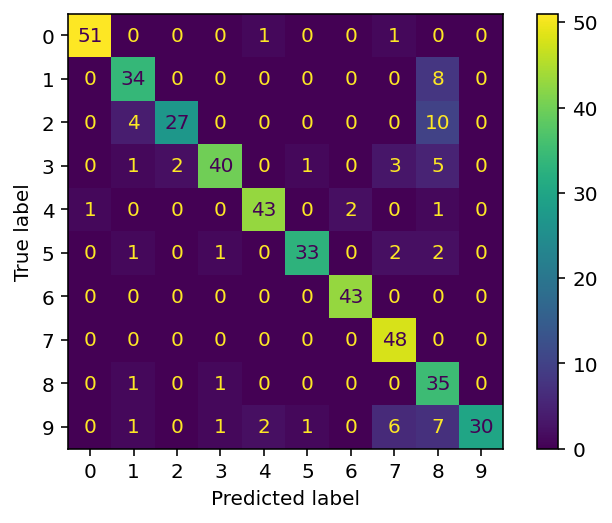

In [ ]:
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

#### Visualisation des erreurs

Identifiez les cas les plus confus.

Identifiez les instances mal classées pour la classe de chiffre au f1-score le plus faible et visualisez les avec le code ci-dessous.

Vous pouvez utiliser la fonction [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) pour trouver l'index des instances en question.

### <span style="color:green">Analyse</span>

On constate que le chiffre 8 a la plus basse __précision__ à 51%, suivi du chiffre 1 à 81% à cause d'une confusion entre 
* le chiffre 1 et les chiffres 2 
* ainsi qu'entre le chiffre 8 et les chiffres {1,2,3}.

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
def plot_digit(idx, xs_test, ys_test, ys_pred):
    print(f"Digit value: {ys_test[idx]}, prediction: {ys_pred[idx]}")
    plt.figure(figsize=(3, 3))
    plt.imshow(xs_test[idx].reshape([8, 8]),cmap=plt.cm.gray_r,interpolation="nearest")


etpe1: affichage de tous les f1 score 

In [ ]:
clf_report_dict= classification_report(Y_test, Y_pred, target_names=target_names,output_dict=True)
f1_scores=[]
for degit in range(10):
    f1_score=clf_report_dict["degit "+str(degit)]['f1-score']
    f1_scores.append(f"{f1_score :.04f}")
pd.DataFrame(f1_scores,columns=['f1 score'])

f1 score
0   0.9714
1   0.8095
2   0.7714
3   0.8421
4   0.9247
5   0.8919
6   0.9773
7   0.8889
8   0.6667
9   0.7692

etape2: Identification des instances mal classées pour la classe de chiffre au f1-score le plus faible

Digit value: 3, prediction: 8
Digit value: 3, prediction: 8
Digit value: 3, prediction: 8
Digit value: 3, prediction: 8
Digit value: 3, prediction: 8


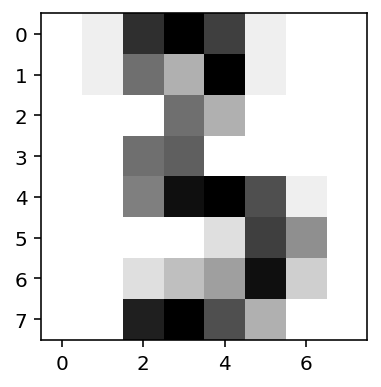

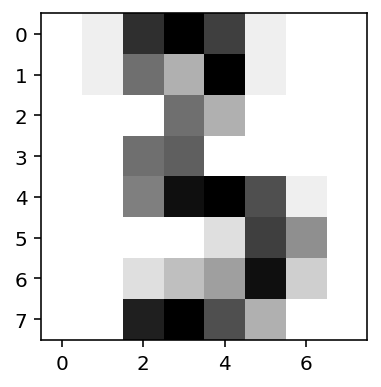

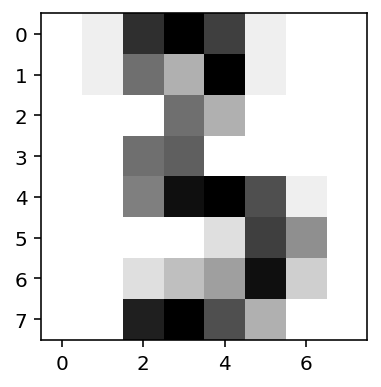

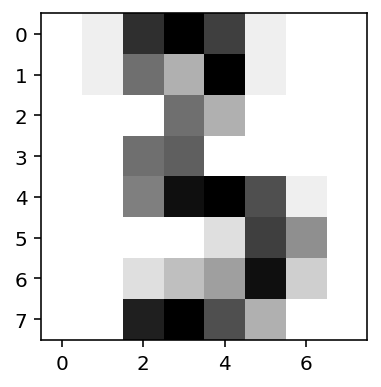

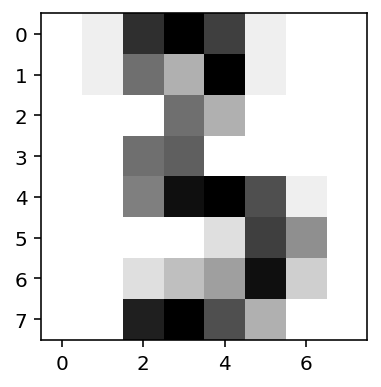

In [ ]:

insMalCla = np.where(Y_test!=Y_pred, Y_test, -1)  # -1 is broadcast
#afficher toutes les instances 
#[plot_digit(x, X_test, Y_test, Y_pred) for x in insMalCla if x!=-1] #
#afficher quelques instances 
i=0
while(i<5):
        plot_digit(insMalCla[i], X_test, Y_test, Y_pred)
        i+=1

In [ ]:
C = [x for x, y in enumerate(zip(Y_test, Y_pred)) if y[0] != y[1]]
#[plot_digit(x, X_test, Y_test, Y_pred) for x in C]

---

### PCA

Utilisez une compression des dimensions par ACP ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), en utilisant 10 composantes principales.

#### Initialisation des PCA et sélection des données entrainement/test

<span style="color:red">Implémentez votre solution ci-dessous</span>

etape1: choisir le n_component adéquat en utilisant fit seulment pour x_train et transform pour xtest et xtrain 

In [ ]:
accuracy_scores=np.zeros(((97-80),2))
for nbc in range(80,97):
    pca_mod = PCA(n_components=nbc/100)
    xpca_train = pca_mod.fit_transform(X_train)
    xpca_test = pca_mod.transform(X_test)
    modelfinal = SVC()
    modelfinal.fit(xpca_train,Y_train)
    Y_pca_pred = modelfinal.predict(xpca_test)
    resultat = accuracy_score(Y_test, Y_pca_pred)
    accuracy_scores[nbc-80,1]=( f"{resultat :.04f}")
    accuracy_scores[nbc-80,0]=nbc/100
pd.DataFrame(accuracy_scores,columns=["nb_component","accuracy_score"])

nb_component  accuracy_score
0           0.80          0.9822
1           0.81          0.9889
2           0.82          0.9889
3           0.83          0.9867
4           0.84          0.9889
5           0.85          0.9889
6           0.86          0.9889
7           0.87          0.9889
8           0.88          0.9911
9           0.89          0.9889
10          0.90          0.9889
11          0.91          0.9867
12          0.92          0.9889
13          0.93          0.9889
14          0.94          0.9911
15          0.95          0.9889
16          0.96          0.9889

etap2: choisir n_components a  une variance a pour accuracy_score 99.1% et donc soit une variance 94% ou 88%

In [ ]:
pca_mod = PCA(n_components=0.88)
xpca_train = pca_mod.fit_transform(X_train)
xpca_test = pca_mod.transform(X_test)

#### Entrainement des modèles

In [ ]:
modelfinal = SVC()
modelfinal.fit(xpca_train,Y_train)
Y_pca_pred = modelfinal.predict(xpca_test)
resultat = accuracy_score(Y_test, Y_pca_pred)

#### Évaluation

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
print("acc_score: " f"{resultat :.04f}")

acc_score: 0.9911


---

### Cross-Validation

![](img/grid_search_cross_validation.png)

#### Chargement des données

Utilisez la fonction [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) pour implémenter la cross-validation.

Vous choisirez de faire 10 splits (`cv=10`).

Choisissez comme *scoring* `"f1_weighted"`, la fonction retournera alors les scores correspondants dans une array.

À titre d'exemple et pour pouvoir comparer les résultats avec les précédents, la première application se fera sur l'entièreté du dataset (ce qui n'est normalement pas recommandé).

<span style="color:red">Implémentez votre solution ci-dessous</span>

avec toute la dataset

In [ ]:
SCORINGS = "f1_weighted"
cv=10
cvs2=cross_val_score(modelfinal, data, digits.target, cv=cv)
pd.DataFrame(cvs2,columns=["scores"])

scores
0  0.944444
1  0.988889
2  0.927778
3  0.966667
4  0.983333
5  0.988889
6  0.988889
7  0.994413
8  0.960894
9  0.955307

with processed  data

In [ ]:
SCORINGS = "f1_weighted"
cv=10
cvs=cross_val_score(modelfinal, xpca_train, Y_train, cv=cv)
pd.DataFrame(cvs,columns=["scores"])

scores
0  0.977778
1  0.977778
2  1.000000
3  0.985185
4  1.000000
5  0.992593
6  0.992593
7  0.992537
8  0.985075
9  0.985075

Montrez les résultats avec un [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) qui inclus une barre d'erreur `yerr` égale à 2 $\times$ l'[écart type](https://numpy.org/doc/stable/reference/generated/numpy.std.html), ainsi que dans un [`boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Notez que la moyenne et la déviation standard peuvent être obtenues également par une méthode (homonyme) de l'array.

<span style="color:red">Implémentez votre solution ci-dessous</span>

<span style="color:green">plt.bar</span>

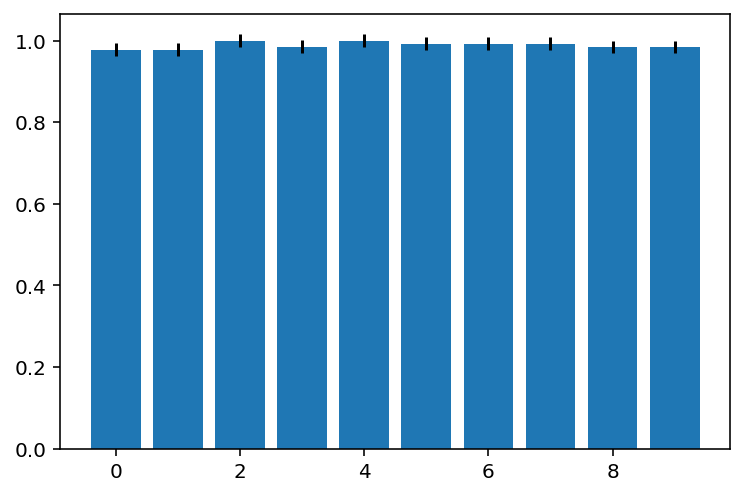

In [ ]:
index= [x for x in range(10)]
std_error = np.std(cvs)*2
plt.bar(index, cvs,yerr=std_error)
plt.show()

<span style="color:green">boxPlot</span>

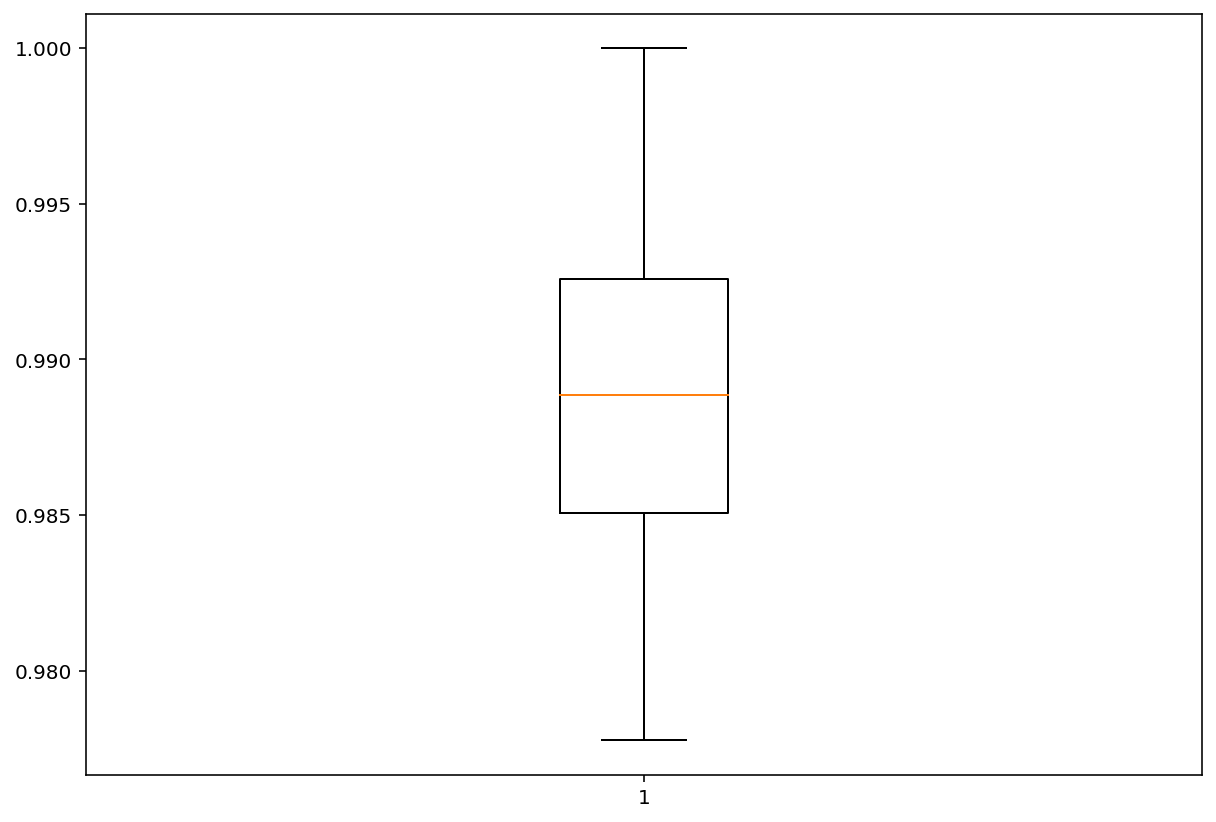

In [ ]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(cvs) 
plt.show()

---

### Grid Search

Cette fois, nous allons utiliser la validation croisée pour sa raison première : valider le choix d'hyperparamètres.

Nous allons utiliser la classe
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pour choisir le meilleur nombre de composante principale pour la PCA.

Cette classe permet de tester plusieurs paramètres (à entrer dans un dictionnaire) et à les tester via cross-validation (d'où le CV dans le nom).

Pour ce faire, nous n'avons plus besoin de nous occuper de créer les différents subsets, la classe `GridSearchCV` s'en charge pour nous.

In [ ]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

Nous allons utiliser un [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) pour effectuer la compression PCA et l'apprentissage avec le modèle conjointement, ce qui va nous permettre de modifier les hyperparamètres à toutes les étapes en une seule commande.

Nous devrons utiliser les noms exacts des hyperparamètres à modifier dans le dictionnaire, précédés du nom du module et d'un double *underscore* (ici: `"pca__"`), pour pouvoir les assigner à la bonne étape du `pipeline`.

Définissez le [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:

pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

Lancez le [Grid search avec cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(data, digits.target)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]})

Trouvez le meilleur résultat, ainsi que la valeur de l'hyperparamètre correspondant.

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [ ]:
print("meilleure param (Cvs=%0.2f):" % search.best_score_)
print(search.best_params_)

meilleure param (Cvs=0.91):
{'pca__n_components': 60}


Imprimez le tableau des résultats complets.

In [ ]:
cv_results_df = pd.DataFrame(search.cv_results_).drop(columns="params")
cv_results_df.style.format("{:.2g}")

Faites un diagramme à barres avec les résultats moyens par valeur de l'hyperparamètre.

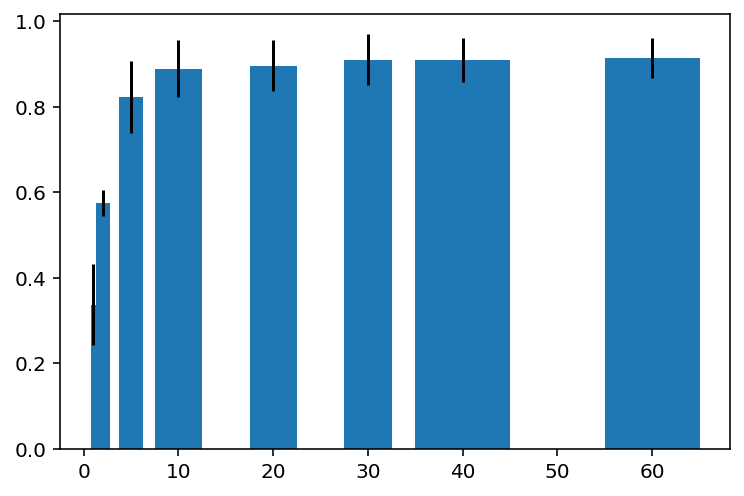

In [ ]:
param = cv_results_df["param_pca__n_components"]

plt.bar(
    cv_results_df["param_pca__n_components"],
    cv_results_df["mean_test_score"],
    yerr=2 * cv_results_df["std_test_score"],
    width=np.diff(cv_results_df["param_pca__n_components"], append=80) / 2,
)
plt.show()

## Exercice (optionnel)

En utilisant la méthode `.predict_proba` de `linear_model.LogisticRegression`, utiliser le résultat de la prédiction pour sélectionner un seuil (*threshold*) particulier pour influencer la classification.

* Pouvez-vous obtenir 100 % de [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) ?
* Pouvez-vous obtenir 100 % de [rappel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) ?
* Mesurez les valeurs de [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) et commentez.
* Tracez la [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) à partir de plusieurs valeurs de seuil.
* Comparez les [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (aire sous la courbe ROC) de la `linear_model.LogisticRegression` et de `naive_bayes.GaussianNB()`.

---